# Modeling data part 2

## From last time:

### model: 

**what is the structure of our model?**

e.g., linear regression

### model parameters: 

**what knobs does the model have?**

e.g., slope, intercept

### loss function: 

**how badly does the model perform?**

e.g., mean squared error, mean absolute error, proportion imperfect match, etc.

### fitting a model: 

**what parameter values minimize loss?**

done via optimization algorithms, 

e.g., brute force grid search, random search, gradient descent.

## Review live code example

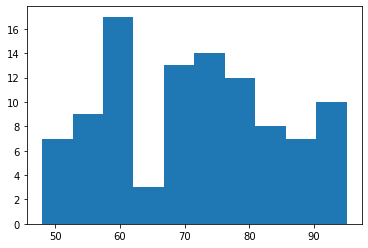

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

y = np.random.randint(48, 96, size=n)

cnt, bins, fig = plt.hist(y)

Consider the following model/parameters/loss.  Let's write functions to do each.

**model**

$\hat y = m$

**parameters:** 

$m$

**loss:**

$\mathrm{loss}(\hat y, y) = \frac{1}{n} \sum_{i=0}^{n} (\hat y_i - y_i)^2$

$\mathrm{loss}(m) = \frac{1}{n} \sum_{i=0}^{n} (m - y_i)^2$


In [2]:
# what arguments should each function take?
# what should it do / return?

def predict(m):
    """returns predicted y given parameters"""
    return m
    
def loss(y_hat, y):
    """returns mse loss of predicted y relative to observed y"""
    return ((y_hat - y)**2).mean()
    
def evaluate_parameters(m, y):
    """returns mse loss for parameter m, relative to observed y"""
    return loss(predict(m), y)
    
def fit(y):
    """returns best fitting parameters given some observed y values"""
    
    best_loss = None
    best_m = None
    
    for m in np.linspace(min(y), max(y), 1000):
        current_loss = evaluate_parameters(m,y)
        
        if best_loss is None or current_loss < best_loss:
            best_loss = current_loss
            best_m = m
    
    return best_m
    
    

In [3]:
fit(y)

71.42942942942943

## Gradient descent optimization

### What's a gradient?

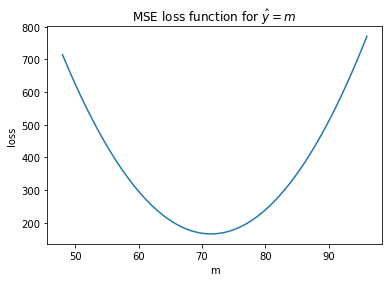

In [4]:
all_ms = np.linspace(48,96,1000)

plt.plot(all_ms, 
         np.vectorize(lambda m: ((y-m)**(2)).mean())(all_ms))
fig = plt.xlabel('m')
fig = plt.ylabel('loss')
fig = plt.title('MSE loss function for $\hat y = m$')

### Gradient

The partial derivative of the loss function with respect to the parameters.

$\mathrm{loss}(m) = \frac{1}{n} \sum_{i=0}^{n} (m - y_i)^2$

This is usually calculated via liberal use of the [chain rule](https://en.wikipedia.org/wiki/Chain_rule)

$\frac{\partial \mathrm{loss}(m)}{\partial m} = \frac{1}{n} \sum_{i=0}^{n}  2 (m - y_i)$

In [5]:
def gradient(m,y):
    """partial derivative of mse loss wrt constant prediction"""
    return (2*(m-y)).mean()

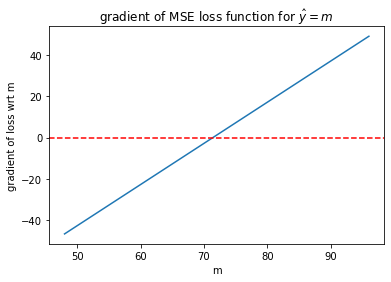

In [6]:
fig = plt.plot(all_ms, np.vectorize(lambda m: gradient(m,y))(all_ms))
fig = plt.axhline(y=0, color='r', linestyle='--')
fig = plt.xlabel('m')
fig = plt.ylabel('gradient of loss wrt m')
fig = plt.title('gradient of MSE loss function for $\hat y = m$')

### Gradient descent

0. pick a starting value of parameters

1. find gradient for current parameter values

2. shift parameters in direction of gradient, by some step size (learning rate).

3. repeat steps 1 and 2... until....

Optional variations:

...until: some number of steps have been taken

...until: improvement is small

learning rate reduces over time.



In [7]:
def gradient_descent(y, learning_rate = 0.1):
    current_m = 0
    
    for step in range(100):
        current_gradient = gradient(current_m, y)
        
        current_m = current_m - learning_rate*current_gradient
    
    return current_m

gradient_descent(y)

71.40999998545351

In [8]:
def loss(m,y):
    return ((y-m)**(2)).mean()

In [9]:
ms = [50]
losses = [loss(ms[-1],y)]

for step in range(100):
    ms.append(ms[-1] - 0.1*gradient(ms[-1], y))
    losses.append(loss(ms[-1],y))

Text(0.5, 1.0, 'trace of gradient descent')

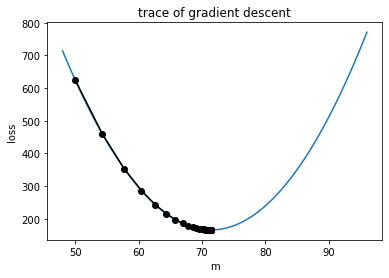

In [10]:
plt.plot(all_ms, np.vectorize(lambda m: ((y-m)**(2)).mean())(all_ms))
plt.plot(ms, losses, 'ko-')
plt.xlabel('m')
plt.ylabel('loss')
plt.title('trace of gradient descent')

### Gradient descent and learning rate

Different regimes:  

- appropriate (rapidly dampening)

- too small (slow learning)

- too big (diverges!)


Text(0.5, 1.0, 'trace of gradient descent')

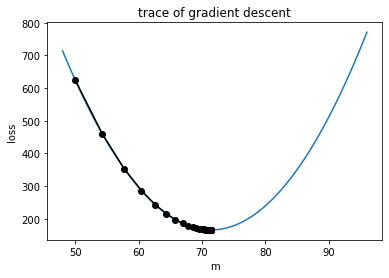

In [11]:
ms = [50]
losses = [loss(ms[-1],y)]

for step in range(100):
    ms.append(ms[-1] - 0.1*gradient(ms[-1], y))
    losses.append(loss(ms[-1],y))
    
    
plt.plot(all_ms, np.vectorize(lambda m: ((y-m)**(2)).mean())(all_ms))
plt.plot(ms, losses, 'ko-')
plt.xlabel('m')
plt.ylabel('loss')
plt.title('trace of gradient descent')

### Gradient descent for us:

Understand roughly what the gradient is.

Understand what the learning rate is, to be able to tweak it.

I will not ask you to do calculus.

## Overfitting



Text(0, 0.5, 'y')

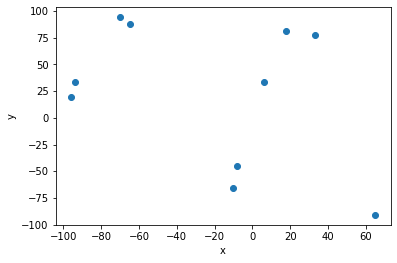

In [12]:
def generate_y(x):
    return np.sin(x/50*np.pi)*100+np.random.randint(-10,10,x.shape)

x = np.random.randint(-100, 100, 10)
y = generate_y(x)

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

### Model "complexity"

With polynomials

e.g., 

0th order: $\hat y = b_0 x^0 = \hat y = b_0$

1st order: $\hat y = b_0 x^0 +  b_1 x^1$

2nd order: $\hat y = b_0 x^0 +  b_1 x^1 +  b_2 x^2$

3rd order: $\hat y = b_0 x^0 +  b_1 x^1 +  b_2 x^2 +  b_3 x^3$

kth order: $\hat y = \sum_{i=0}^k b_k x^k$



In [13]:
all_xs = np.linspace(-100,100, 100)

def poly_predict(x, coefs):
    prediction = np.zeros(x.shape)
    for order,coef in enumerate(reversed(coefs)):
        prediction += x**order * coef
    return prediction

[ 1.61146346e-13  3.32061391e-11  7.98739951e-10 -1.96272781e-07
 -8.80060314e-06  2.93099001e-04  9.32035598e-03 -2.42244626e-01
  4.75382342e+00  1.16945779e+01]


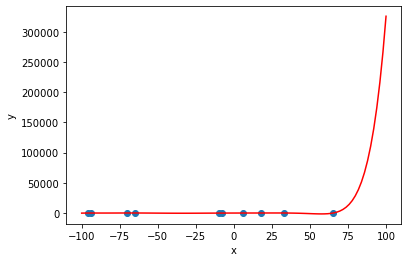

In [14]:
coefs = np.polyfit(x,y,9)
print(coefs)

f = plt.scatter(x,y)
f = plt.xlabel('x')
f = plt.ylabel('y')
f = plt.plot(all_xs, poly_predict(all_xs, coefs), 'r-')

### Training loss as a function of order

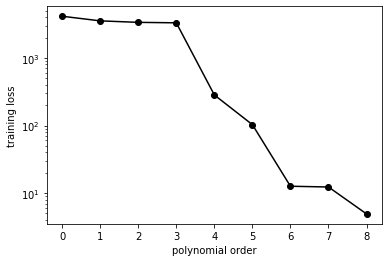

In [15]:
def loss(predicted_y,y):
    """mean squared error"""
    return ((predicted_y-y)**2).mean()

ks = np.arange(0, 9)
training_loss = np.zeros(ks.shape)

for k in ks:
    coefs = np.polyfit(x,y,k)
    training_loss[k] = loss(poly_predict(x,coefs),y)

plt.plot(ks, training_loss, 'ko-')
plt.xlabel('polynomial order')
plt.ylabel('training loss')
plt.yscale('log')


### Loss on *new* data

In [16]:
new_xs = np.random.randint(-100, 100, 10)
new_ys = generate_y(new_xs)

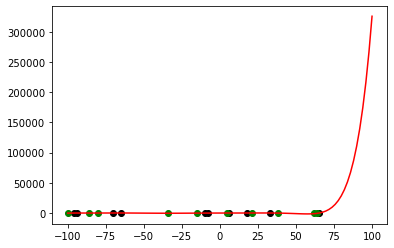

In [17]:
coefs = np.polyfit(x,y,9)
plt.scatter(x, y, marker = 'o', color='black')
plt.scatter(new_xs, new_ys, marker = 'o', color='green')
plt.plot(all_xs, poly_predict(all_xs, coefs), 'r-')

In [18]:
ks = np.arange(0, 9)
training_loss = np.zeros(ks.shape)
new_data_loss = np.zeros(ks.shape)

for k in ks:
    coefs = np.polyfit(x,y,k)
    training_loss[k] = loss(poly_predict(x,coefs),y)
    new_data_loss[k] = loss(poly_predict(new_xs,coefs),new_ys)

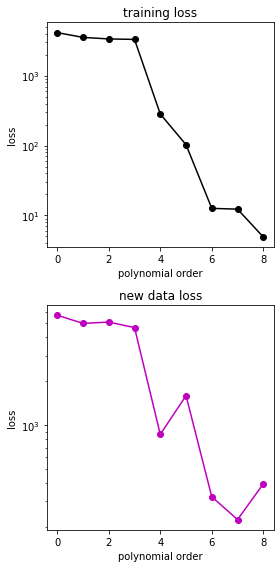

In [19]:
fig, axs = plt.subplots(2,1, figsize = (4,8))
axs[0].plot(ks, training_loss, 'ko-')
axs[0].set_xlabel('polynomial order')
axs[0].set_ylabel('loss')
axs[0].set_title('training loss')
axs[0].set_yscale('log')
axs[1].plot(ks, new_data_loss, 'mo-')
axs[1].set_xlabel('polynomial order')
axs[1].set_ylabel('loss')
axs[1].set_title('new data loss')
axs[1].set_yscale('log')
fig.tight_layout()

Text(0.5, 1.0, 'training and new data loss as a function of polynomial order')

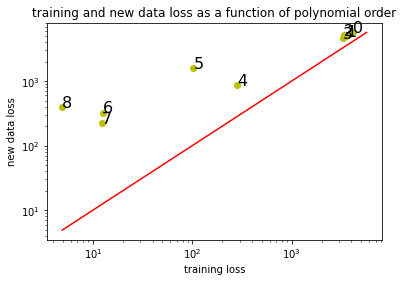

In [20]:
plt.scatter(training_loss, new_data_loss, marker = 'o', color='y')
for k in range(9):
    plt.text(training_loss[k], new_data_loss[k], str(k), color='k', fontsize = 16)
plt.plot([min(training_loss), max(new_data_loss)], [min(training_loss), max(new_data_loss)], 'r-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('training loss')
plt.ylabel('new data loss')
plt.title('training and new data loss as a function of polynomial order')

### Overfitting

The thing happening above is called *overfitting*.  A complicated model has many degrees of freedom to wiggle through all the data points in the training data set.  But it will be fitting *noise* not *signal*.  And, as such, will generalize to new data badly.




### Cross validation

To **evaluate** a model, we want to know how well it will do on *new* data.  But we don't have new data.  What are we to do?

The answer is called "cross validation".  We will use *part* of our data to train the model, and the rest of our data to evaluate the model.

In [21]:
import pandas as pd

bf = pd.read_csv('bodyfat.csv')

bf = bf[bf['height'] > 30]

bf = bf[bf['age'] < 30]

bf

,bf.percent,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


Text(0, 0.5, 'bodyfat percentage')

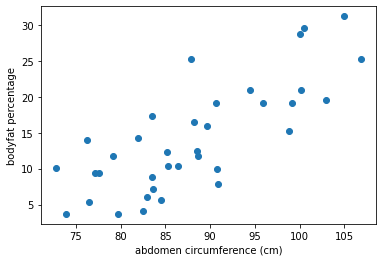

In [22]:
plt.scatter(bf['abdomen'], bf['bf.percent'])
plt.xlabel('abdomen circumference (cm)')
plt.ylabel('bodyfat percentage')

### train test split

split the data into a *training* set and a *test* set.

let's say we will take 50% of the data for the training set, and 50% for the test set.



In [23]:
bf

,bf.percent,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


- random sampling (with replacement) of indexes: might get overlap between training and test, and we might not include all the data.

- random sampling without replacement twice.  

In [24]:
from random import sample

n = len(bf)

In [25]:
# n = 35
35//2 # equivalent to int(35/2)

17

In [26]:
n_train = n//2
n_test = n - n_train

print(n, n_train, n_test)

36 18 18


In [27]:
train_idx = sample(list(range(n)), n_train)
test_idx = list(set(range(n)) - set(train_idx))

In [28]:
print(set(train_idx) & set(test_idx)) # no overlap
print(set(range(n)) - (set(train_idx) | set(test_idx)) ) # full coverage

set()
set()


We should not just take the first half for training, and second half for test, because the data appear to be sorted by age.  We want test and training data to be *random*

In [29]:
n = len(bf)
n

36

In [30]:
n_train = n//2
n_test = n - n_train
assert (n_test + n_train) == n

In [31]:
all_idx = list(range(n))
print(all_idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


In [32]:
from random import shuffle

shuffle(all_idx)

print(all_idx)

[29, 22, 28, 31, 10, 3, 15, 16, 4, 18, 11, 17, 34, 26, 6, 32, 27, 20, 19, 9, 5, 33, 7, 23, 0, 1, 24, 25, 30, 21, 2, 8, 14, 13, 12, 35]


In [33]:
train_idx = all_idx[:n_train]
test_idx = all_idx[n_train:]

assert len(train_idx) == n_train  # right length
assert len(test_idx) == n_test    # right length
assert len(set(train_idx) & set(test_idx)) == 0 # zero overlap
assert len(set(train_idx) | set(test_idx)) == n # full coverage of all data

In [34]:
train_data = bf.iloc[train_idx]
test_data = bf.iloc[test_idx]

In [35]:
test_data

,bf.percent,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
31,5.7,29,160.25,71.25,37.3,93.5,84.5,100.6,58.5,38.8,21.5,30.1,26.4,17.9
9,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2
5,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
155,17.3,28,171.50,75.25,35.6,92.1,83.5,98.3,57.3,37.8,21.7,32.2,27.7,17.7
7,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
145,14.2,24,156.00,70.75,35.7,92.7,81.9,95.3,56.4,36.5,22.0,33.5,28.3,17.3
0,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
146,19.2,24,208.50,72.75,39.2,102.0,99.1,110.1,71.2,43.5,25.2,36.1,30.3,18.7
147,29.6,25,206.50,69.75,40.9,110.9,100.5,106.2,68.4,40.8,24.6,33.3,29.7,18.4


In [36]:
train_data

,bf.percent,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,bicep,forearm,wrist
151,19.6,26,241.75,74.50,41.8,108.3,102.9,114.4,72.9,43.5,25.1,38.5,33.8,19.6
144,10.3,23,188.15,77.50,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3
150,9.4,26,152.25,69.00,35.4,92.9,77.6,93.5,56.9,35.9,20.4,31.6,29.0,17.8
153,16.5,27,156.75,67.25,37.9,94.0,88.2,95.2,56.8,37.4,22.8,30.6,28.3,17.9
10,7.1,26,186.25,74.50,38.5,101.5,83.6,98.2,59.7,39.7,25.2,32.8,29.4,18.5
3,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
24,14.0,28,151.25,67.75,34.5,90.2,76.3,95.8,58.4,35.5,22.9,31.1,28.0,17.6
25,3.7,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
4,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
29,8.8,29,160.75,69.00,36.7,97.4,83.5,98.7,58.9,35.3,22.6,30.1,26.7,17.6


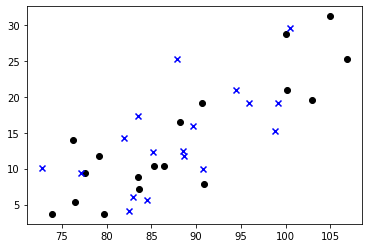

In [37]:
plt.scatter(train_data['abdomen'], train_data['bf.percent'], marker='o', color='k')
plt.scatter(test_data['abdomen'], test_data['bf.percent'], marker='x', color='b')

Text(0, 0.5, 'bodyfat percentage')

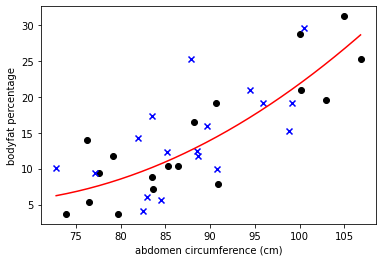

In [38]:
polynomial_order = 2

coefs = np.polyfit(train_data['abdomen'], 
                   train_data['bf.percent'], 
                   polynomial_order)

all_xs = np.linspace(min(bf['abdomen']), max(bf['abdomen']), 200)

plt.scatter(train_data['abdomen'], train_data['bf.percent'], marker='o', color='k')
plt.scatter(test_data['abdomen'], test_data['bf.percent'], marker='x', color='b')
plt.plot(all_xs, poly_predict(all_xs, coefs), 'r-')
plt.xlabel('abdomen circumference (cm)')
plt.ylabel('bodyfat percentage')

In [39]:
print('training loss:', 
      (
          (poly_predict(train_data['abdomen'], coefs) 
           - train_data['bf.percent'])**2).mean())

print('test loss:', ((poly_predict(test_data['abdomen'], coefs) - test_data['bf.percent'])**2).mean())


training loss: 16.519309419831487
test loss: 25.350219127861124


In [40]:
poly_order = []
train_loss = []
test_loss = []

for k in range(len(train_data)):
    coefs = np.polyfit(train_data['abdomen'], train_data['bf.percent'], k)
    poly_order.append(k)
    train_loss.append(((poly_predict(train_data['abdomen'], coefs) - train_data['bf.percent'])**2).mean())
    test_loss.append(((poly_predict(test_data['abdomen'], coefs) - test_data['bf.percent'])**2).mean())
    

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3417: RankWarning: 

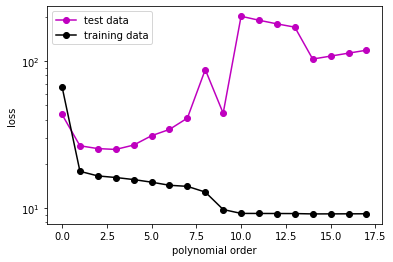

In [41]:
l1 = plt.plot(poly_order, test_loss, 'mo-')
l2 = plt.plot(poly_order, train_loss, 'ko-')
plt.legend(['test data', 'training data'])
plt.xlabel('polynomial order')
plt.ylabel('loss')
plt.yscale('log')


## Summary

### Gradient descent

Optimization is much more efficient if we can calculate the gradient, and follow it to find better parameters.

We must specify a learning rate, to dictate how large a step to take in the direction of the gradient.

Small learning rates create slow optimization.  Large learning rates may create *divergence*.  So these may need to be *tuned*.

### Model complexity

Some models have more parameters, and more opportunities to wiggle than others.

A more complex model can *always* fit the data better, by using its extra wiggling power.

### Overfitting

A very complex model fitted to a small set of data will *overfit* the data, and will wiggle through the noise, not just the signal.  

This means that the model will fit the *training* data well, but will *generalize* poorly to new data, meaning it will have a large error on new data it has not seen.

### Cross-validation

To **evaluate** a model, we want to know how well it will do on *new* data, not how well it fit the existing data.

By definition, we don't have new data.  

So we pretend that we have only seen part of our data, and reserve the rest to be considered new data.

We split the data into a *training* subset, and a *test* subset.  We fit the model to the *training* data, and evaluate it on the *test* data, thus estimating how well the model would do on data it was not fitted to.  i.e., on new data.



## Cross validation subtleties:

How much data to use for training, and for testing?

### Variations:

**holdout**

**k-fold**

- split the data into k parts.

- then for each part, use it as the test data once, and the remainder as the training data.

**repeat random subsampling**

**nested**